<a href="https://colab.research.google.com/github/SihyunPark01/Colab/blob/main/Ch03.%EB%94%A5%EB%9F%AC%EB%8B%9D%20/%209_RNN_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
날짜: 21/10/28 
이름: 박시현
내용: 딥러닝 RNN 실습하기
"""

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

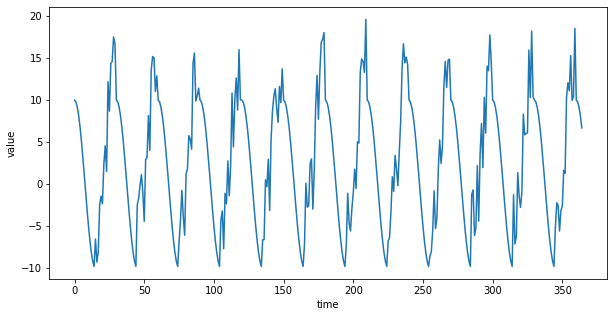

In [ ]:
# 시계열 데이터 생성
time = np.arange(365)
month_time = (time % 30) / 30
time_series = 10 * np.where(month_time < 0.5, 
                            np.cos(2*np.pi * month_time),
                            np.cos(2*np.pi * month_time) + np.random.random(365))
time_series


# 시각화
plt.figure(figsize=(10, 5))
plt.xlabel('time')
plt.ylabel('value')
plt.plot(np.arange(0, 365), time_series[:365])

In [ ]:
#  데이터 정규화
def make_sequence(time_seires, n):
  train_data, train_label = [], []

  for i in range(len(time_series)):
    t = time_series[i:(i+n)]

    if(i+n) < len(time_seires):
      train_data.append(t)
      train_label.append(time_series[i+n])
    else:
      break

  return np.array(train_data), np.array(train_label)        

train_data, train_label = make_sequence(time_series, 10)  
train_data
train_label

array([-5.        , -6.69130606, -8.09016994, -9.13545458, -9.78147601,
       -6.51546155, -9.26486287, -8.07448659, -2.46214157, -1.41892798,
       -2.33043792,  2.36767822,  4.56432428,  1.49803887, 12.18157416,
        8.67428729, 14.33248251, 14.6027555 , 17.51201562, 16.70323363,
       10.        ,  9.78147601,  9.13545458,  8.09016994,  6.69130606,
        5.        ,  3.09016994,  1.04528463, -1.04528463, -3.09016994,
       -5.        , -6.69130606, -8.09016994, -9.13545458, -9.78147601,
       -2.44758402, -1.63786512, -0.11906314,  1.13786612, -1.03276286,
       -4.42034049,  2.935095  ,  3.19964147,  8.15330893,  4.01363781,
       13.5656295 , 15.18154258, 15.00919834, 11.03411565, 12.88071316,
       10.        ,  9.78147601,  9.13545458,  8.09016994,  6.69130606,
        5.        ,  3.09016994,  1.04528463, -1.04528463, -3.09016994,
       -5.        , -6.69130606, -8.09016994, -9.13545458, -9.78147601,
       -6.85969018, -4.29131376, -0.74793746, -3.80796045, -6.07

In [ ]:
# 데이터셋 구조변환
train_data = train_data.reshape(-1, 10, 1)     #-1은 자동생성, 355 X 10 X 1의 육면체같이 생성
train_label = train_label.reshape(-1, 1)

print(train_data.shape)

(355, 10, 1)


In [ ]:
# 학습데이터, 라벨
_train_data = train_data[:300]
_train_label = train_label[:300]

_test_data = train_data[300:]
_test_label = train_label[300:]


In [ ]:
# 모델설계
model = Sequential()
model.add(SimpleRNN(units=32, activation='tanh', input_shape=(10,1)))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                1088      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델설정
model.compile(optimizer='Adam', loss='mse', metrics=['acc'])

In [ ]:
# 학습하기
model.fit(_train_data, _train_label, epochs=1000)     # loss는 떨어지는데 acc(정확도)는 왜 0인가? RNN은 추세선이므로 주어진 그래프를 통해 다음 그래프를 예측...

Epoch 1/1000
10/10 [==============================] - 3s 16ms/step - loss: 44.6127 - acc: 0.0000e+00
Epoch 2/1000
10/10 [==============================] - 0s 15ms/step - loss: 37.4977 - acc: 0.0000e+00
Epoch 3/1000
10/10 [==============================] - 0s 16ms/step - loss: 32.4846 - acc: 0.0000e+00
Epoch 4/1000
10/10 [==============================] - 0s 16ms/step - loss: 28.7388 - acc: 0.0000e+00
Epoch 5/1000
10/10 [==============================] - 0s 15ms/step - loss: 25.8035 - acc: 0.0000e+00
Epoch 6/1000
10/10 [==============================] - 0s 16ms/step - loss: 23.3479 - acc: 0.0000e+00
Epoch 7/1000
10/10 [==============================] - 0s 17ms/step - loss: 21.4363 - acc: 0.0000e+00
Epoch 8/1000
10/10 [==============================] - 0s 16ms/step - loss: 19.6942 - acc: 0.0000e+00
Epoch 9/1000
10/10 [==============================] - 0s 15ms/step - loss: 18.0775 - acc: 0.0000e+00
Epoch 10/1000
10/10 [==============================] - 0s 15ms/step - loss: 16.8745 - acc: 

In [ ]:
# 성능평가
model.evaluate(_test_data, _test_label)

2/2 [==============================] - 0s 10ms/step - loss: 9.8858 - acc: 0.0000e+00


[9.885774612426758, 0.0]

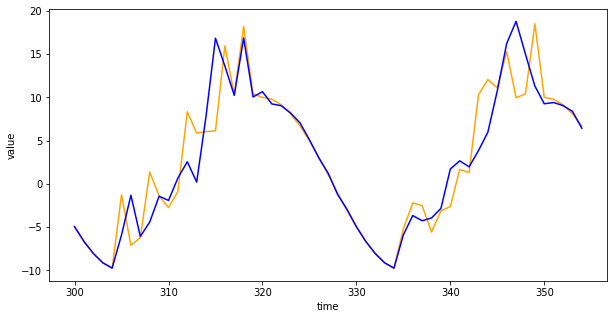

In [ ]:
# 그래프 출력
result = model.predict(_test_data)
result_range = np.arange(len(_train_label), len(_train_label)+len(result))
result_range

plt.figure(figsize=(10, 5))
plt.xlabel('time')
plt.ylabel('value')

plt.plot(result_range, _test_label, color='orange', label='label')
plt.plot(result_range, result, color='blue', label='result')